In [45]:
import os
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
import re
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.stem import PorterStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the folder path
folder_path = r"C:\Users\toqae\Downloads\review_polarity\txt_sentoken\pos"
folder_path2 = r"C:\Users\toqae\Downloads\review_polarity\txt_sentoken\neg"

# Define an empty list to store the file contents
file_contents = []
file_value = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Open the file and read its content
        with open(os.path.join(folder_path, filename), 'r') as file:
            content = file.read()
            # Append the content to the list
            file_contents.append(content)
            file_value.append(1)
            
            
for filename in os.listdir(folder_path2):
    if filename.endswith('.txt'):
        # Open the file and read its content
        with open(os.path.join(folder_path2, filename), 'r') as file:
            content = file.read()
            # Append the content to the list
            file_contents.append(content)
            file_value.append(0)            

# Create a data frame with the file contents
df = pd.DataFrame({'Document': file_contents, 'review': file_value})


In [46]:
print(df.head())

                                            Document  review
0  films adapted from comic books have had plenty...       1
1  every now and then a movie comes along from a ...       1
2  you've got mail works alot better than it dese...       1
3   " jaws " is a rare film that grabs your atten...       1
4  moviemaking is a lot like being the general ma...       1


In [47]:
print(df.tail())

                                               Document  review
1995  if anything , " stigmata " should be taken as ...       0
1996  john boorman's " zardoz " is a goofy cinematic...       0
1997  the kids in the hall are an acquired taste . \...       0
1998  there was a time when john carpenter was a gre...       0
1999  two party guys bob their heads to haddaway's d...       0


In [48]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def preprocessing(x):
   newx=[]
##preprocessing
   for i in range(0, len(x)):
     review = re.sub('[^a-zA-Z]', ' ',x[i])
     review = review.lower()
     review = review.split()
     stemmer = PorterStemmer()
     review = [stemmer.stem(word) for word in review if not word in set(stopwords)]
     #review = ' '.join(review)
     review = [lemmatizer.lemmatize(word) for word in review]
     review = ' '.join(review)
     newx.append(review)
   return newx

In [49]:
X=df['Document']
Xnew=preprocessing(X)

In [50]:
Y=df['review']
x_train, x_test, y_train, y_test = model_selection.train_test_split(Xnew,Y,test_size=0.20,random_state=0)

In [51]:
tf_idf = TfidfVectorizer()
tf_idf.fit(Xnew)
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(x_train)

#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(x_test)

X_train_tf.data

array([0.01405618, 0.01784678, 0.01501715, ..., 0.02675568, 0.01990129,
       0.02923474])

In [52]:
#Naive Bayes Classifier  
classifier=naive_bayes.MultinomialNB(alpha=0.2)
classifier.fit(X_train_tf, y_train)
accuracy_nb = accuracy_score(y_test, classifier.predict(X_test_tf))
print(accuracy_nb)

0.8075


In [53]:
#Logistic Regression Classifier
classifier=linear_model.LogisticRegression()
classifier.fit(X_train_tf, y_train)
accuracy_lr = accuracy_score(y_test, classifier.predict(X_test_tf))
# Assuming your trained model is stored in a variable called "model"
with open('model.pickle', 'wb') as file:
    pickle.dump(classifier, file)

print(accuracy_lr)

0.8375


In [54]:
#SVM Classifier
classifier=svm.SVC()
classifier.fit(X_train_tf, y_train)
accuracy_svm = accuracy_score(y_test, classifier.predict(X_test_tf))
print(accuracy_svm)

0.8275


In [55]:
#Decision Tree Classifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_tf, y_train)
accuracy_dt = accuracy_score(y_test, classifier.predict(X_test_tf))
print(accuracy_dt)

0.63


In [56]:
#KNN Classifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_tf, y_train)
accuracy_knn = accuracy_score(y_test, classifier.predict(X_test_tf))
print(accuracy_knn)

0.6675


C:\Users\toqae\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
#for new data 
'''''
with open('file.txt', 'r') as file:
    content = file.read()


data_proprocessed=preprocessing(content)


with open('model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(data_proprocessed)


if predictions==1:
    print("Good Review")
elif predictions==0:
    print("Bad Review")
'''


'\'\'\nwith open(\'file.txt\', \'r\') as file:\n    content = file.read()\n\n\ndata_proprocessed=preprocessing(content)\n\n\nwith open(\'model.pickle\', \'rb\') as file:\n    loaded_model = pickle.load(file)\n\npredictions = loaded_model.predict(data_proprocessed)\n\n\nif predictions==1:\n    print("Good Review")\nelif predictions==0:\n    print("Bad Review")\n'

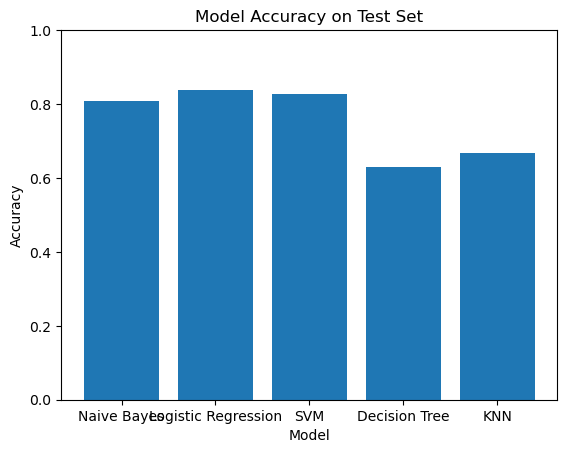

In [58]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy_scores = [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn]

plt.bar(models, accuracy_scores)
plt.title('Model Accuracy on Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()